#  Indian Restaurant Data Analysis

This project aims to explore and analyze restaurant data from India to uncover patterns in consumer preferences, cuisine popularity, pricing, ratings, delivery services, and other key features.  

By performing detailed exploratory data analysis (EDA), this notebook seeks to answer questions such as:  

- Which cuisines are most popular across Indian cities?  
- How do ratings and votes vary by price range and location?  
- What is the relationship between online delivery, table booking, and overall restaurant performance?  
- Which restaurants stand out in their respective cuisines and cities?  

The analysis combines data wrangling, feature engineering, and advanced visualization to generate actionable business insights for restaurant owners, delivery platforms, investors, and other food industry stakeholders.  

**Key Techniques Used:**  
- Pandas for data cleaning and transformation  
- Matplotlib and Seaborn for visualization  
- Grouping and pivoting for summarization  
- Feature engineering for currency standardization and cuisine splitting  

The findings from this project can help businesses identify gaps in the market, optimize their services, and better cater to evolving customer demands.  


In [168]:
#importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv("/content/zomato.csv", encoding="latin1")

In [112]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [113]:
df.shape

(9551, 21)

In [114]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [115]:
df.nunique()

,0
Restaurant ID,9551
Restaurant Name,7446
Country Code,15
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677
Cuisines,1825


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [117]:
df.duplicated().sum()

np.int64(0)

In [118]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [119]:
country= pd.read_excel("/content/Country-Code.xlsx")

In [120]:
country.head(5)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [121]:
final_df=pd.merge(df,country,on='Country Code', how='left')



In [122]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [123]:
final_df['Country'].value_counts()

,count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
South Africa,60
UAE,60
New Zealand,40
Turkey,34
Australia,24


In [129]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [130]:
import pandas as pd
import numpy as np

def standardize_cost_to_inr(df):

    # Define exchange rates to INR (
    currency_rates_to_inr = {
        'Indian Rupees(Rs.)': 1.0,
        'Dollar($)': 83.33,
        'Pound(£)': 105.00,
        'Brazilian Real(R$)': 14.29,
        'Rand(R)': 4.58,
        'UAE Dirham(AED)': 22.67,
        'NewZealand($)': 50.00,
        'Turkish Lira(TL)': 2.38,
        'Botswana Pula(P)': 6.17,
        'Indonesian Rupiah(IDR)': 0.0054,
        'Qatari Rial(QR)': 22.86,
        'Sri Lankan Rupee(LKR)': 0.27,
        'Unknown': 1.0
    }

    df['Currency'] = df['Currency'].fillna('Unknown')

    df['Average Cost for two'] = df.groupby('Price range')['Average Cost for two'].transform(
        lambda x: x.fillna(x.median()) if x.notna().any() else 0
    )

    df['Standard_currency'] = df.apply(
        lambda x: x['Average Cost for two'] * currency_rates_to_inr.get(x['Currency'], 1.0), axis=1
    )

    df['Standard_currency'] = df.groupby('Price range')['Standard_currency'].transform(
        lambda x: x.fillna(x.median()) if x.notna().any() else 0
    )

    return df

# Standardize prices to INR for consistent and comparable analysis




In [131]:
df=standardize_cost_to_inr(final_df)

In [132]:
df['Cuisines'].value_counts().sort_values(ascending=False)

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
...,...
"Seafood, Asian, Filipino, Indian",1
"French, Japanese, Desserts",1
"Italian, World Cuisine",1


In [133]:
cuisines_series = df['Cuisines'].dropna()

# split by comma and strip spaces
cuisines_lists = cuisines_series.apply(lambda x: [c.strip() for c in x.split(',')])

# flatten to a single list
all_cuisines = [cuisine for sublist in cuisines_lists for cuisine in sublist]

In [134]:
from collections import Counter

In [135]:
Top_15_cuisines=Counter(all_cuisines).most_common(15)

In [136]:
# Create a new column with the cleaned list of cuisines for each restaurant
df['Cuisine_List'] = df['Cuisines'].dropna().apply(lambda x: [c.strip() for c in x.split(',')])

# Extract only the cuisine names from the Top_15_cuisines list of tuples
top_15_cuisine_names = [cuisine[0] for cuisine in Top_15_cuisines]

# Handle any NaN values in 'Cuisine_List' by filling with an empty list
df['Cuisine_List'] = df['Cuisine_List'].fillna(value=pd.Series([[]] * len(df), index=df.index))


# Filter rows where at least one cuisine is in the top 15 cuisine names
df_filtered = df[df['Cuisine_List'].apply(lambda x: any(cuisine in top_15_cuisine_names for cuisine in x))]

In [137]:
# Remove rows with missing aggregate rating (if any)
df_filtered = df_filtered[df_filtered['Aggregate rating'].notna()]

# Sort and select top 10
top_10_restaurants = df_filtered.sort_values(by='Aggregate rating', ascending=False).head(10)

# Optional: Select only relevant columns
top_10_restaurants = top_10_restaurants[['Restaurant Name', 'Cuisines', 'Aggregate rating']]
print(top_10_restaurants)
print("*"*100)
print(top_15_cuisine_names)


                    Restaurant Name                               Cuisines  \
9538                      Starbucks                                   Cafe   
1381                    Caterspoint        Mexican, American, Healthy Food   
124              Rae's Coastal Cafe           American, Caribbean, Seafood   
2289                Barbeque Nation                           North Indian   
9404                         Solita                American, Burger, Grill   
9424      Mainland China Restaurant                                Chinese   
2536                Barbeque Nation  North Indian, European, Mediterranean   
2350  Zolocrust - Hotel Clarks Amer           Italian, Bakery, Continental   
2409                Barbeque Nation                  North Indian, Chinese   
9262                Barbeque Nation   North Indian, Chinese, Mediterranean   

      Aggregate rating  
9538               4.9  
1381               4.9  
124                4.9  
2289               4.9  
9404            

/tmp/ipython-input-138-4109624201.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=cuisines, palette="viridis")


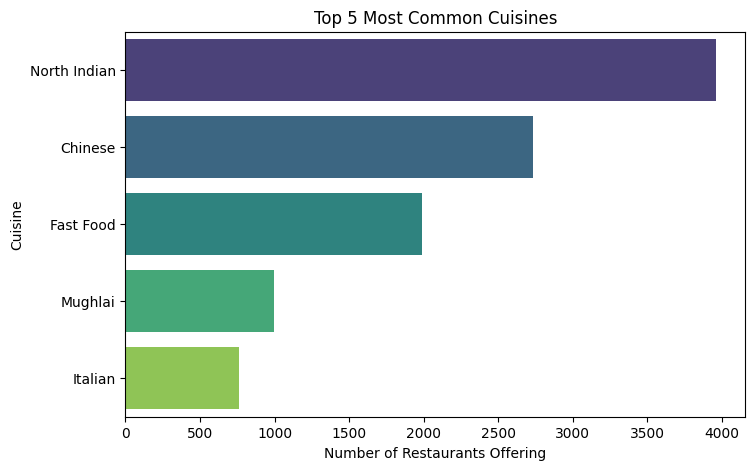

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# barplot for top 5 cuisines
cuisine_counts = Counter(all_cuisines)
top5_cuisine_counts = cuisine_counts.most_common(5)

cuisines, counts = zip(*top5_cuisine_counts)

plt.figure(figsize=(8,5))
sns.barplot(x=counts, y=cuisines, palette="viridis")
plt.title("Top 5 Most Common Cuisines")
plt.xlabel("Number of Restaurants Offering")
plt.ylabel("Cuisine")
plt.show()


In [139]:
cuisines

('North Indian', 'Chinese', 'Fast Food', 'Mughlai', 'Italian')

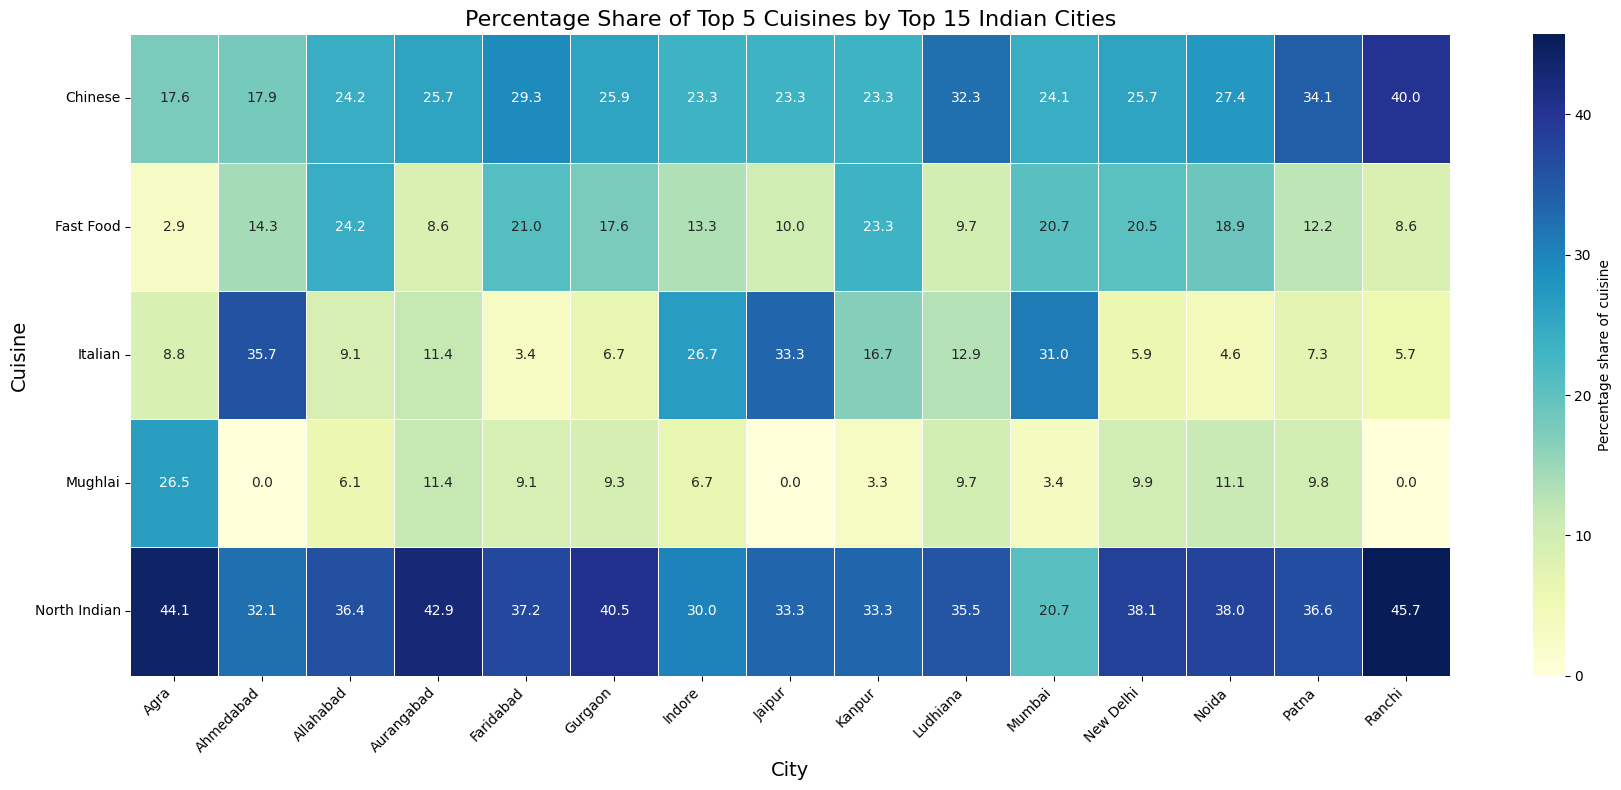

In [164]:
cuisines_df = df[df['Country'] == 'India']

# define your top 5 cuisines
top_5_cuisines = ['North Indian', 'Chinese', 'Fast Food', 'Mughlai', 'Italian']

# explode the cuisines column
cuisine_exploded = cuisines_df.assign(
    Cuisines=cuisines_df['Cuisines'].str.split(',')
).explode('Cuisines')

# clean whitespace
cuisine_exploded['Cuisines'] = cuisine_exploded['Cuisines'].str.strip()

# filter for the top 5 cuisines
filtered = cuisine_exploded[cuisine_exploded['Cuisines'].isin(top_5_cuisines)]

# find top 15 cities with most restaurants
top_cities = (
    filtered['City']
    .value_counts()
    .head(15)
    .index
)

# keep only those cities
filtered_top_cities = filtered[filtered['City'].isin(top_cities)]

# build pivot table
pivot = pd.crosstab(filtered_top_cities['Cuisines'], filtered_top_cities['City'])

# convert counts to percentages within each city
pivot_percent = pivot.div(pivot.sum(axis=0), axis=1) * 100

# plot
plt.figure(figsize=(18,8))
sns.heatmap(
    pivot_percent,
    cmap="YlGnBu",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={'label': 'Percentage share of cuisine'}
)

plt.title("Percentage Share of Top 5 Cuisines by Top 15 Indian Cities", fontsize=16)
plt.xlabel("City", fontsize=14)
plt.ylabel("Cuisine", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [140]:
best_restaurants = []

for cuisine in cuisines:
    # filter rows where the restaurant serves this cuisine
    filtered = df[df['Cuisines'].str.contains(cuisine, na=False, case=False)]
    # sort by Votes first, then Aggregate rating, descending
    top_row = filtered.sort_values(by=['Votes', 'Aggregate rating'], ascending=False).head(1)
    if not top_row.empty:
        best_restaurants.append(top_row)

# combine
best_restaurants_df = pd.concat(best_restaurants)


In [141]:
# Top5 restaurants per city based upon the top 5 most Popular cuisine and their
# aggregate rating and no of votes.

best_restaurants_df[['Restaurant Name','City',"Cuisine_List"]]

,Restaurant Name,City,Cuisine_List
3994,Hauz Khas Social,New Delhi,"[Continental, American, Asian, North Indian]"
2414,Barbeque Nation,Kolkata,"[North Indian, Chinese]"
7863,Big Yellow Door,New Delhi,"[Cafe, Italian, Fast Food]"
4178,Karim's,New Delhi,"[Mughlai, North Indian]"
728,Toit,Bangalore,"[Italian, American, Pizza]"


In [142]:
india_df = df[
    (df['Country'] == 'India') &
    (df['Has Online delivery'] == "Yes") &
    (df['Rating color'].isin(["Green","Dark Green"]))]

In [143]:
india_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Standard_currency,Cuisine_List
646,18396250,Huber & Holly,1,Ahmedabad,"7 B, Circle B, Opposite Rajpath Club, Sarkhej...",Bodakdev,"Bodakdev, Ahmedabad",72.512395,23.038311,"Ice Cream, Desserts, Continental",...,No,No,1,4.5,Dark Green,Excellent,217,India,300.0,"[Ice Cream, Desserts, Continental]"
648,113433,Fozzie's Pizzaiolo,1,Ahmedabad,"Ground Floor, Maruti Crystal, Opposite Rajpath...",Bodakdev,"Bodakdev, Ahmedabad",72.509806,23.033069,"Pizza, Italian, Beverages, Desserts",...,No,No,3,4.3,Green,Very Good,731,India,900.0,"[Pizza, Italian, Beverages, Desserts]"
649,18438909,La Pino'z Pizza,1,Ahmedabad,"Shop 10, Circle B, Nyay Marg, Bodakdev, Ahmed...",Bodakdev,"Bodakdev, Ahmedabad",72.512487,23.038231,"Pizza, Italian",...,No,No,2,4.4,Green,Very Good,113,India,500.0,"[Pizza, Italian]"
650,18143128,Mocha,1,Ahmedabad,"6-9, Ground Floor, Devashish Business Park, Op...",Bodakdev,"Bodakdev, Ahmedabad",72.511307,23.031851,"Cafe, Continental, Desserts",...,No,No,3,4.4,Green,Very Good,944,India,1000.0,"[Cafe, Continental, Desserts]"
657,113537,Puffizza,1,Ahmedabad,"103, Kairos, Opposite Mahatma Gandhi Labour In...",Gurukul,"Gurukul, Ahmedabad",72.537750,23.046193,"Italian, Fast Food",...,No,No,2,4.3,Green,Very Good,744,India,700.0,"[Italian, Fast Food]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,6508117,Sautí©ed Stories,1,Pune,"Plot 5, Between Lane 5/6, North Main Road, Opp...",Koregaon Park,"Koregaon Park, Pune",73.897902,18.539299,"Cafe, Italian, Continental",...,No,No,2,4.2,Green,Very Good,583,India,850.0,"[Cafe, Italian, Continental]"
9166,11371,Chili's,1,Pune,"UG 49, Phoenix Market City, Nagar Road, Viman ...","Phoenix Market City, Viman Nagar","Phoenix Market City, Viman Nagar, Pune",73.916619,18.562450,"Mexican, American, Tex-Mex",...,No,No,3,4.5,Dark Green,Excellent,1439,India,1800.0,"[Mexican, American, Tex-Mex]"
9168,18292672,Blue Water,1,Pune,"Punawale, Near Basket Bridge,Off Aundh-Ravet B...",Ravet,"Ravet, Pune",73.751081,18.636215,"North Indian, Chinese, Continental",...,No,No,3,4.2,Green,Very Good,487,India,1500.0,"[North Indian, Chinese, Continental]"
9170,6507967,Tales & Spirits,1,Pune,"Plot 64, Shivaji Housing Society, Senapati Bap...",Senapati Bapat Road,"Senapati Bapat Road, Pune",73.828972,18.530963,"Italian, Continental, Cafe",...,No,No,2,4.1,Green,Very Good,997,India,800.0,"[Italian, Continental, Cafe]"


In [144]:
best_india = (
    india_df
    .sort_values(by=['Votes','Aggregate rating'], ascending=[False, False])
    .groupby('City')
    .head(1)
)


In [145]:
#Top 5 best restaurants in india according to votes and Aggregate Rating
best_india[:5]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Standard_currency,Cuisine_List
735,51040,Truffles,1,Bangalore,"28, 4th 'B' Cross, Koramangala 5th Block, Bang...",Koramangala 5th Block,"Koramangala 5th Block, Bangalore",77.614293,12.933298,"American, Burger, Cafe",...,No,No,2,4.7,Dark Green,Excellent,9667,India,800.0,"[American, Burger, Cafe]"
3994,308322,Hauz Khas Social,1,New Delhi,"9-A & 12, Hauz Khas Village, New Delhi",Hauz Khas Village,"Hauz Khas Village, New Delhi",77.194471,28.554285,"Continental, American, Asian, North Indian",...,No,No,3,4.3,Green,Very Good,7931,India,1600.0,"[Continental, American, Asian, North Indian]"
2412,20404,Peter Cat,1,Kolkata,"18A, Park Street, Park Street Area, Kolkata",Park Street Area,"Park Street Area, Kolkata",88.352885,22.552672,"Continental, North Indian",...,No,No,3,4.3,Green,Very Good,7574,India,1000.0,"[Continental, North Indian]"
2300,90744,Exotica,1,Hyderabad,"Opposite Audi Showroom, 5th Floor, 12th Square...","12th Square Building, Banjara Hills","12th Square Building, Banjara Hills, Hyderabad",78.437225,17.410371,"Mughlai, North Indian, Chinese",...,No,No,3,4.3,Green,Very Good,3374,India,1500.0,"[Mughlai, North Indian, Chinese]"
2490,49003,SpiceKlub,1,Mumbai,"8A, Janta Industrial Estate, Opposite Phoenix ...",Lower Parel,"Lower Parel, Mumbai",72.825553,18.994237,North Indian,...,No,No,3,4.2,Green,Very Good,3370,India,1500.0,[North Indian]


In [148]:
Value_for_money_india = (
    india_df
    .sort_values(by=['Average Cost for two','Votes','Aggregate rating'], ascending=[True,False,False])
    .groupby('City')
    .head(1)
)
Value_for_money_india_rest_top5 = Value_for_money_india

In [149]:
Value_for_money_india_rest_top5[['Restaurant Name',"City",'Average Cost for two','Votes','Aggregate rating']].reset_index(drop=True)

,Restaurant Name,City,Average Cost for two,Votes,Aggregate rating
0,Jung Bahadur Kachori Wala,New Delhi,50,405,4.1
1,Huber & Holly,Ahmedabad,300,217,4.5
2,CakeBee,Coimbatore,350,200,4.9
3,Eat Street,Bangalore,400,753,4.3
4,Slice of Spice,Kochi,400,246,4.0
5,Crudo Juicery,Gurgaon,400,154,4.3
6,Super Donuts,Chandigarh,450,265,4.0
7,Mad Over Donuts,Noida,450,235,4.2
8,Writer's Cafe,Chennai,450,191,4.2
9,Eat Street Express,Nagpur,500,103,4.0


/tmp/ipython-input-150-4293785341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chain_counts.values, y=chain_counts.index, palette='plasma')


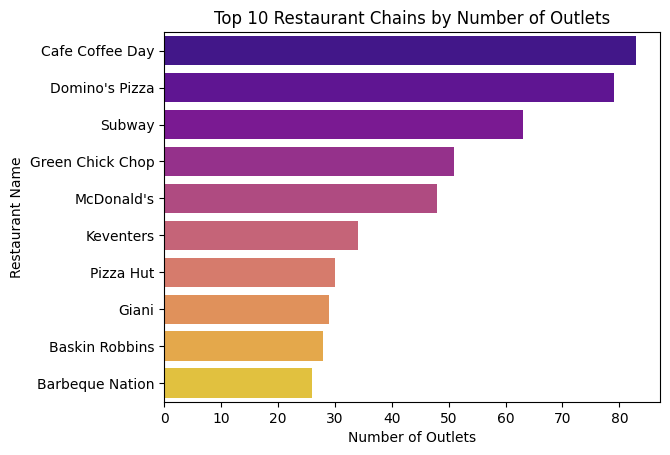

In [150]:
chain_counts = df['Restaurant Name'].value_counts().head(10)
sns.barplot(x=chain_counts.values, y=chain_counts.index, palette='plasma')
plt.title("Top 10 Restaurant Chains by Number of Outlets")
plt.xlabel("Number of Outlets")
plt.show()


In [169]:
df['Rating color'].value_counts()

,count
Rating color,
Orange,3737
White,2148
Yellow,2100
Green,1079
Dark Green,301
Red,186


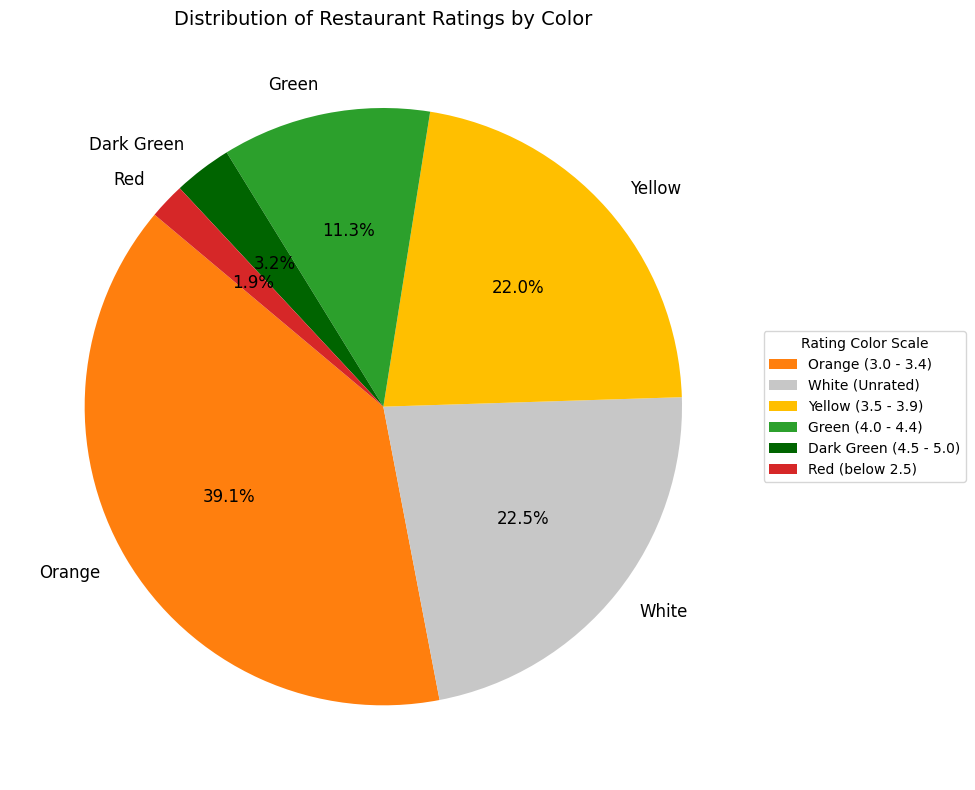

In [170]:
color_counts = {
    'Orange': 3737,
    'White': 2148,
    'Yellow': 2100,
    'Green': 1079,
    'Dark Green': 301,
    'Red': 186
}

# data
labels = list(color_counts.keys())
sizes = list(color_counts.values())

# color mapping
colors = {
    'Orange': '#ff7f0e',      # average
    'White': '#c7c7c7',       # unrated
    'Yellow': '#ffbf00',      # fair
    'Green': '#2ca02c',       # good
    'Dark Green': '#006400',  # excellent
    'Red': '#d62728'          # poor
}

# assign colors in order
color_list = [colors[label] for label in labels]

# plot
plt.figure(figsize=(10,8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=color_list,
    textprops={'fontsize': 12}
)

# legend with value ranges
legend_labels = [
    "Orange (3.0 - 3.4)",
    "White (Unrated)",
    "Yellow (3.5 - 3.9)",
    "Green (4.0 - 4.4)",
    "Dark Green (4.5 - 5.0)",
    "Red (below 2.5)"
]

plt.legend(wedges, legend_labels, title="Rating Color Scale", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Distribution of Restaurant Ratings by Color", fontsize=14)
plt.tight_layout()
plt.show()

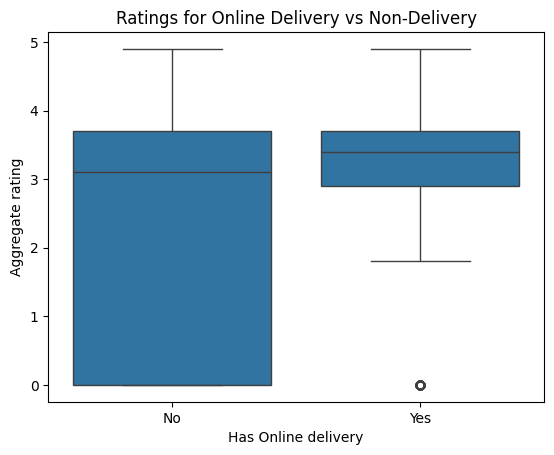

In [157]:
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df)
plt.title("Ratings for Online Delivery vs Non-Delivery")
plt.show()


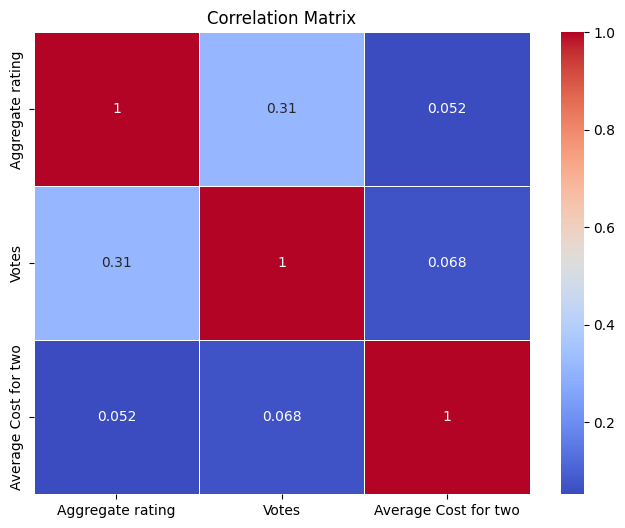

In [159]:
numerical_cols = ['Aggregate rating', 'Votes', 'Average Cost for two']

corr = df[numerical_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix")
plt.show()

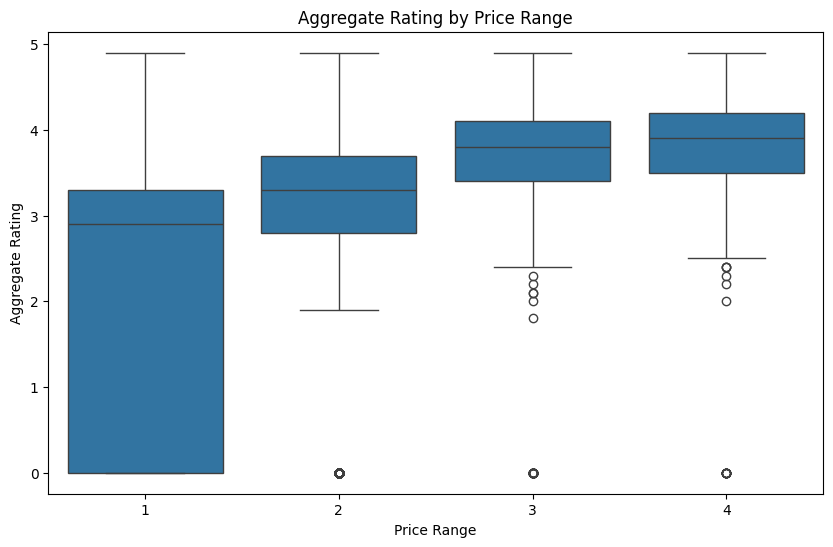

In [165]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title("Aggregate Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.show()


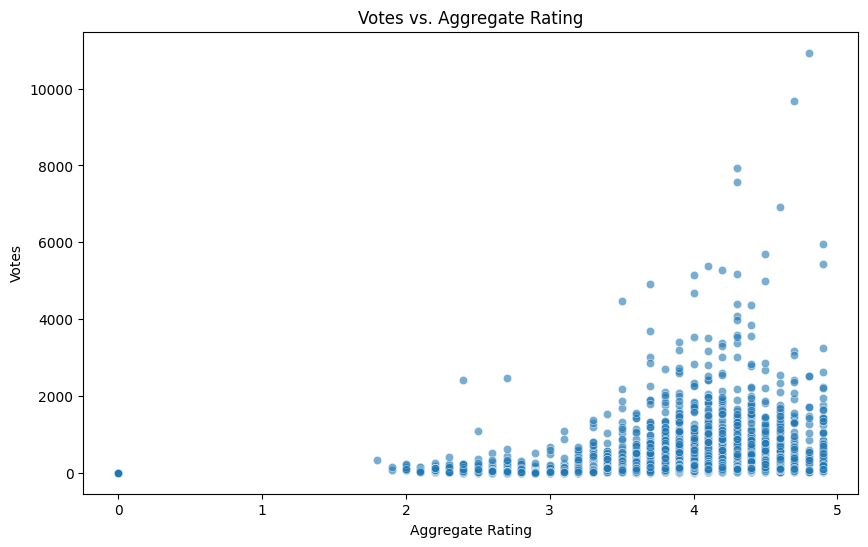

In [166]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Aggregate rating', y='Votes', data=df, alpha=0.6)
plt.title("Votes vs. Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Votes")
plt.show()


/tmp/ipython-input-167-1686994086.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=online_cities.values, y=online_cities.index, palette='crest')


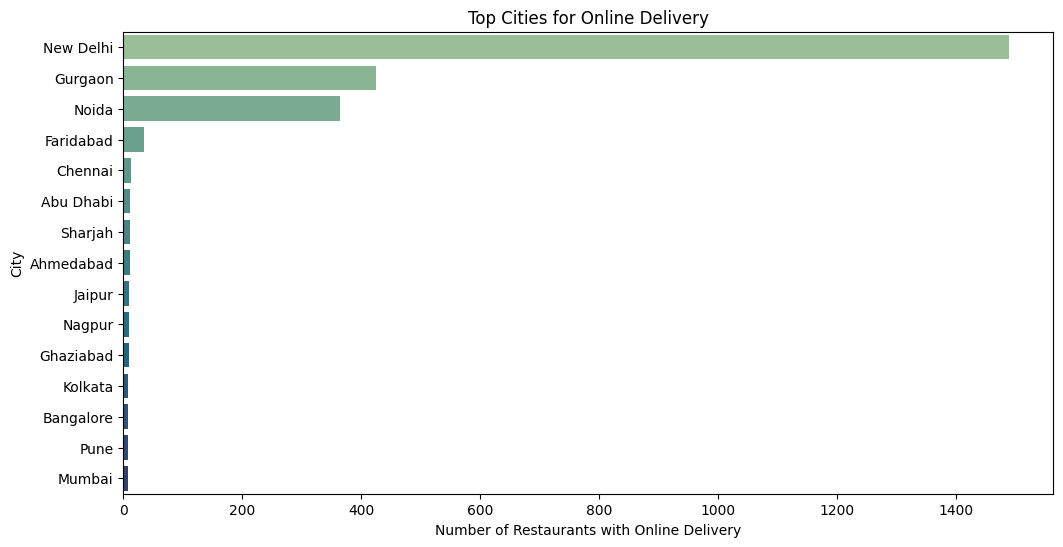

In [167]:
online_cities = df[df['Has Online delivery']=='Yes']['City'].value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=online_cities.values, y=online_cities.index, palette='crest')
plt.xlabel("Number of Restaurants with Online Delivery")
plt.title("Top Cities for Online Delivery")
plt.show()


# 📌 Final Insights

1️⃣ **Cuisine Preferences**  
North Indian, Chinese, Fast Food, Mughlai, and Italian remain the most sought-after cuisines in India’s restaurant sector, reflecting familiar and consistent tastes among urban diners.

2️⃣ **Ratings Distribution**  
A large proportion of restaurants fall in the orange and yellow rating ranges (roughly 3.0 to 3.9), indicating moderate customer satisfaction. Very few achieve top-tier dark green (4.5+) ratings, showing clear room to improve quality.

3️⃣ **Votes and Popularity**  
Restaurants with higher ratings also tend to accumulate more votes, suggesting that customers reward quality with engagement. Encouraging reviews and feedback could help newer restaurants build trust and reputation.

4️⃣ **Delivery and Booking**  
Major Indian cities have embraced online delivery and table booking services. However, there is significant potential to expand these offerings in mid-tier cities, providing a growth opportunity for platforms and partners.

5️⃣ **Pricing and Perceived Quality**  
Higher price-range restaurants slightly correlate with better ratings, indicating that customers often associate premium pricing with superior quality. Nevertheless, affordable restaurants continue to attract high engagement, showing strong demand in price-sensitive segments.

6️⃣ **Top Performers**  
Identifying the best restaurants by cuisine and city helps establish performance benchmarks. These top performers can serve as role models for others looking to replicate excellence in quality, service, and innovation.

---

# ✅ Recommendations

- **Restaurant Owners**: Invest in quality improvements to move from average to excellent ratings.  
- **Delivery Platforms**: Expand table booking and delivery features into emerging markets and mid-tier cities.  
- **Investors**: Consider investing in cities with a high number of restaurants but lower cuisine diversity, as they show market gaps.  
- **Policy Makers**: Support initiatives that encourage more diverse cuisine offerings, especially in smaller cities, to drive growth and variety in the food industry.

